<AxesSubplot:>

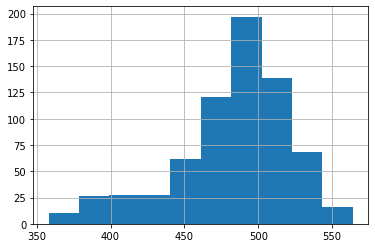

In [2]:
#import packages
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
 
    #read in Math data
pisaall = pd.read_csv('C:/Users/danie/OneDrive/nya_files/Documents/pisaall.csv')


#test for normality on all data for boys for all years
pisaall.Value[pisaall.SUBJECT == 'BOY'].hist()

<AxesSubplot:>

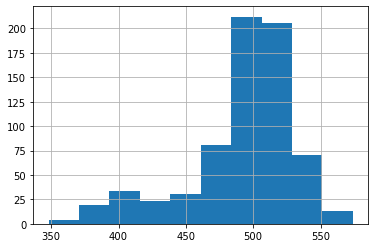

In [3]:
#test for normality on all data for girls for all years
pisaall.Value[pisaall.SUBJECT == 'GIRL'].hist()

In [5]:
#subset data for 7 countries from 2012 to 2018
pisa7 = pisaall[(pisaall["TIME"] == "2012") & (pisaall["TIME"] <= 2018) | (pisaall["LOCATION"].isin(["AUS", "MEX", "LUX", "JPN", "KOR", "TUR", "USA"]))]

In [6]:
#new subset data
pisa7.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,PISAMATH,BOY,MEANSCORE,A,2003,527.000,NaN
1,AUS,PISAMATH,BOY,MEANSCORE,A,2006,527.000,NaN
2,AUS,PISAMATH,BOY,MEANSCORE,A,2009,519.000,NaN
3,AUS,PISAMATH,BOY,MEANSCORE,A,2012,510.115,NaN
4,AUS,PISAMATH,BOY,MEANSCORE,A,2015,497.000,NaN


<AxesSubplot:>

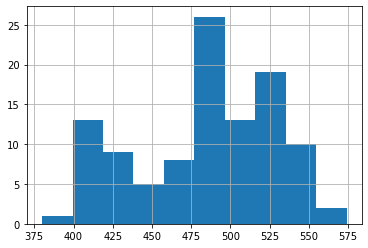

In [7]:
#test for normalilty on subset data for girls
pisa7.Value[pisa7.SUBJECT == 'GIRL'].hist()

<AxesSubplot:>

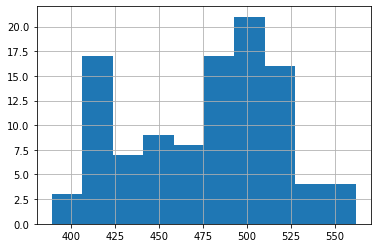

In [8]:
#test for normality on subset data for boys
pisa7.Value[pisa7.SUBJECT == 'BOY'].hist()

In [9]:
#ttest on subset data
ttest_ind(pisa7.Value[pisa7.SUBJECT == 'GIRL'], pisa7.Value[pisa7.SUBJECT == 'BOY'])


Ttest_indResult(statistic=1.191759108096292, pvalue=0.23470079249129427)

In [10]:
#import packages for ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


In [11]:
#check to ensure that both DV and IV are integers
pisa7.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 1779
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    281 non-null    object 
 1   INDICATOR   281 non-null    object 
 2   SUBJECT     281 non-null    object 
 3   MEASURE     281 non-null    object 
 4   FREQUENCY   281 non-null    object 
 5   TIME        281 non-null    int64  
 6   Value       281 non-null    float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 19.8+ KB


In [14]:
#recode IV
def recode (series):
    if series == "AUS": 
        return 0
    if series == "MEX": 
        return 1
    if series == "LUX": 
        return 2
    if series == "JPN": 
        return 3
    if series == "KOR": 
        return 4
    if series == "TUR": 
        return 5
    if series == "USA": 
        return 6
    
pisa7['LOCATIONC'] = pisa7['LOCATION'].apply(recode)

    
 



C:\Users\danie\AppData\Local\Temp\ipykernel_15404\2253990600.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa7['LOCATIONC'] = pisa7['LOCATION'].apply(recode)


In [15]:
##create dataset with recoded data
pisa8 = pisa7[['LOCATIONC','Value']]

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value', ylabel='Density'>

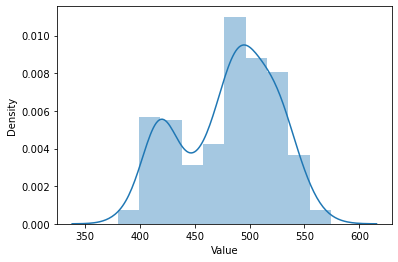

In [18]:
#import package to test for normality of IV
import seaborn as sns

sns.distplot(pisa8['Value'])

In [20]:
#import package to run ANOVA
from scipy.stats import bartlett


bartlett(pisa8['Value'], pisa8['LOCATIONC'])


BartlettResult(statistic=1285.5072298453001, pvalue=1.594841143327938e-281)